# Chapter 8: Recommenders for WBSFLIX

This notebook defines various recommenders for the WBSFLIX scenario based on the [MovieLens](http://movielens.org) database:

- popularity-based recommendations
- item-based recommendations
- user-based recommendations

## Modules

In [1]:
import pandas as pd
import sys

sys.path.append('../src/')
from recommenders import *

## Data

In [2]:
movies_df = pd.read_csv('../data/ml-latest-small/movies.csv', index_col='movieId')
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_df = pd.read_csv('../data/ml-latest-small/ratings.csv')
ratings_df.timestamp = pd.to_datetime(ratings_df.timestamp, unit='s')
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


In [4]:
(
  ratings_df
  .head()
  .join(movies_df.title, on='movieId')
)

,userId,movieId,rating,timestamp,title
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995)
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995)
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995)
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)"


## Popularity-based recommender

In [7]:
pop_recommendations.df = (ratings_df
  .groupby('movieId')
  .agg(
    rating_mean = ('rating', 'mean'),
    rating_count = ('rating', 'count')
  )
  .sort_values(('rating_count'))
  .reset_index()
  .assign(count_quantile=lambda x: x.index/x.index.max())
  .set_index('movieId')
  .assign(score=lambda x: x.rating_mean**2 * x.rating_count)
  .sort_values('score', ascending=False)
)


In [5]:
pop_recommendations(10).join(movies_df.title)


,rating_mean,rating_count,count_quantile,score,title
movieId,,,,,
318,4.429022,317,0.999897,6218.347003,"Shawshank Redemption, The (1994)"
356,4.164134,329,1.000000,5704.863222,Forrest Gump (1994)
296,4.197068,307,0.999794,5407.922638,Pulp Fiction (1994)
2571,4.192446,278,0.999589,4886.295863,"Matrix, The (1999)"
593,4.161290,279,0.999691,4831.258065,"Silence of the Lambs, The (1991)"
260,4.231076,251,0.999486,4493.402390,Star Wars: Episode IV - A New Hope (1977)
2959,4.272936,218,0.998972,3980.239679,Fight Club (1999)
527,4.225000,220,0.999074,3927.137500,Schindler's List (1993)
110,4.031646,237,0.999280,3852.237342,Braveheart (1995)


## Item-based recommender

In [5]:
user_item_matrix = (
  pd.pivot_table(
    data=ratings_df,
    values='rating',
    index='userId',
    columns='movieId',
    fill_value=0)
  .astype(pd.SparseDtype('float', 0))
)
user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Movie similarity based on user-to-user-cosines

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

item_cosines_matrix = (
  pd.DataFrame(
    cosine_similarity(user_item_matrix.T),
    columns=user_item_matrix.columns,
    index=user_item_matrix.columns)
  .astype(pd.SparseDtype('float', 0))
)

item_cosines_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.410562,1.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.296917,0.282438,1.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035573,0.106415,0.092406,1.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.308762,0.287795,0.417802,0.188376,1.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
193583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
193585,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


### Number of users that have rated any pair of movies

In [7]:
# Table showing how many users have rated both of any given pair of books
# The diagonal consequently contains the number of raters for any book
# individually
item_pair_raters = (
  (user_item_matrix.astype('bool').astype('int')) # filter for any rating a user has done
  #.dtypes
  #.astype('int')
  #.astype(pd.SparseDtype('int', 0))         # count each as one
  # calculate the scalar product of any pair of columns (books)
  # which gives the sum of users who have rated both of these books
  .pipe(lambda x: x.T.dot(x)) # nice matrix notation for that
  .astype(pd.SparseDtype('int', 0))
)

In [8]:
item_pair_raters

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,215,68,32,2,32,58,32,5,12,69,...,0,0,0,0,0,0,0,0,0,0
2,68,110,26,3,22,36,18,6,3,56,...,0,0,0,0,0,0,0,0,0,0
3,32,26,52,1,19,25,19,4,9,23,...,0,0,0,0,0,0,0,0,0,0
4,2,3,1,7,3,2,6,1,0,4,...,0,0,0,0,0,0,0,0,0,0
5,32,22,19,3,49,24,23,4,9,20,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
193583,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
193585,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


### Precompute an attenuated score which suppresses scores based on less than 10 raters

But still keep them for cases where there are less than the requested number of recommendations.

Rationale: better bad recommendations than none.

Benefit: Even faster to compute because more is precomputed.


In [9]:
from scipy.special import expit

def sigmoid(x, x0, w):
  """
  Sigmoid using the logistic function centered at `x0` and with (approximate)
  transition width `w`

  sigmoid(x0-2*w, x0, w) ≈ 0.000006
  sigmoid(x0-  w, x0, w) ≈ 0.0025
  sigmoid(x0    , x0, w) = 0.5
  sigmoid(x0+  w, x0, w) ≈ 0.9975
  sigmoid(x0+2*w, x0, w) ≈ 0.999994

  The function theoretically never reaches exactly zero or one, however
  numerically (on Colab):

  sigmoid(   6.122800095, 0, 1) == 1
  sigmoid(-118.29712    , 0, 1) == 0
  """
  return expit(6*(x-x0)/w)

def attenuate(values, criterion, threshold=10, margin=6):
    return values * (criterion.apply(lambda x: sigmoid(x, threshold, margin)))

In [35]:
item_recommendations.df = (
  attenuate(item_cosines_matrix, item_pair_raters, 10, 3)
  .rename_axis('refMovieId')
  .melt(ignore_index=False, value_name='score')
  .sort_values(['refMovieId', 'score'], ascending=[True, False])
  .groupby('refMovieId')
  .head(100)
  .join(item_pair_raters.stack().rename('raters'), on=['refMovieId', 'movieId'])
)
item_recommendations.df

,movieId,score,raters
refMovieId,,,
1,1,1.000000e+00,215
1,3114,5.726013e-01,81
1,480,5.656368e-01,132
1,780,5.642617e-01,122
1,260,5.573882e-01,134
...,...,...,...
193609,8783,1.799563e-09,1
193609,6537,1.791886e-09,1
193609,106782,1.787036e-09,1


In [46]:
item_recommendations.df.loc[2].head(11).reset_index(drop=True)

,movieId,score,raters
0,2,1.000000,110
1,364,0.588438,82
2,500,0.549818,72
3,367,0.544981,75
4,480,0.538046,87
5,586,0.524876,62
6,551,0.518161,54
7,588,0.515620,74
8,595,0.507458,66
9,19,0.497560,51


In [15]:
item_recommendations(1732, 10).join(movies_df.title)

,score,pair_raters,title
movieId,,,
1732,1.000000,106,"Big Lebowski, The (1998)"
1089,0.603944,72,Reservoir Dogs (1992)
1206,0.578395,65,"Clockwork Orange, A (1971)"
4011,0.567300,58,Snatch (2000)
1682,0.560140,67,"Truman Show, The (1998)"
1884,0.556866,37,Fear and Loathing in Las Vegas (1998)
2997,0.553965,60,Being John Malkovich (1999)
1222,0.548967,55,Full Metal Jacket (1987)
7438,0.545875,59,Kill Bill: Vol. 2 (2004)


## User-based recommender

Here, we use the [surprise](https://surprise.readthedocs.io/en/stable/index.html) library
which comes with slightly different data-set infrastructure.

### Load data

In [16]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df.iloc[:, 0:3], reader)

trainset, testset = train_test_split(data, test_size=0.2)

### Optimize meta-parameters

In [17]:
from surprise import KNNBasic, KNNWithMeans, accuracy, KNNWithZScore, SlopeOne
from surprise import SVD
from surprise.model_selection import GridSearchCV

# param_grid = {
#   "n_epochs": [5, 10, 20],
#   "lr_all": [0.002, 0.005],
#   "reg_all": [0.2, 0.4, 0.6],
# }

#gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae", "fcp"], cv=3)

param_grid = {
  "k": [
    #10, 20,
    40,
    #60, 80
  ],
  "sim_options": {
    "name": [
      #"msd",
      #"cosine",
      "pearson"],
    "user_based": [True],
  },
}

gs = GridSearchCV(KNNWithZScore, param_grid, measures=["rmse", "mae", "fcp"], cv=3, n_jobs=-1, joblib_verbose=5)

gs.fit(data)

#knn = KNNWithZScore(sim_options=sim_options)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished


In [18]:
gs.best_params

{'rmse': {'k': 40, 'sim_options': {'name': 'pearson', 'user_based': True}},
 'mae': {'k': 40, 'sim_options': {'name': 'pearson', 'user_based': True}},
 'fcp': {'k': 40, 'sim_options': {'name': 'pearson', 'user_based': True}}}

### Evaluate performance

In [19]:
algo = gs.best_estimator['fcp']
algo.fit(trainset);

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [20]:
predictions = algo.test(testset)
predictions_df = pd.DataFrame(predictions, columns=["userId", "movieId", "actual_user_rating", "estimated_user_rating", "details"])
predictions_df

,userId,movieId,actual_user_rating,estimated_user_rating,details
0,380,35957,3.0,3.703398,"{'actual_k': 8, 'was_impossible': False}"
1,608,4638,3.0,2.404830,"{'actual_k': 26, 'was_impossible': False}"
2,517,1148,3.0,3.170013,"{'actual_k': 25, 'was_impossible': False}"
3,414,5500,4.0,4.352789,"{'actual_k': 6, 'was_impossible': False}"
4,365,104241,4.0,2.511986,"{'actual_k': 2, 'was_impossible': False}"
...,...,...,...,...,...
20163,27,2406,4.0,3.386571,"{'actual_k': 30, 'was_impossible': False}"
20164,411,208,4.0,2.555887,"{'actual_k': 40, 'was_impossible': False}"
20165,403,61132,2.0,4.013989,"{'actual_k': 14, 'was_impossible': False}"
20166,91,4034,4.0,3.760747,"{'actual_k': 39, 'was_impossible': False}"


In [21]:
accuracy.mae(predictions), accuracy.rmse(predictions), accuracy.fcp(predictions);

MAE:  0.6716
RMSE: 0.8854
FCP:  0.6537


#### Distribution plot of estimated vs. actual ratings on test-set

/home/til/local/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/til/local/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


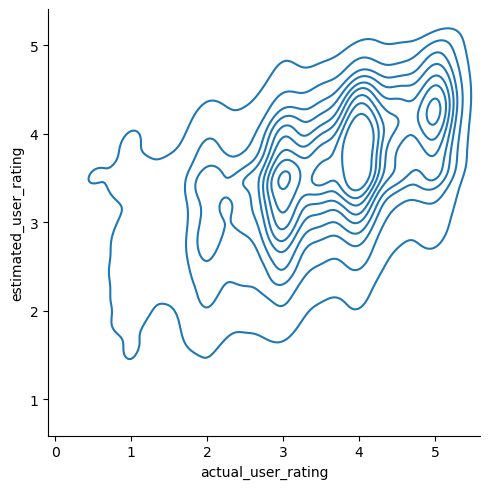

In [22]:
import seaborn as sns
sns.displot(data=predictions_df, x="actual_user_rating", y="estimated_user_rating", kind="kde")

### Preparation of recommender

In [23]:
full_train = data.build_full_trainset()
algo.fit(full_train);

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [24]:
user_recommendations.df = (
    pd.DataFrame(algo.test(full_train.build_anti_testset()))
    [['uid', 'iid', 'est']]
    .sort_values(['uid', 'est'], ascending=[True, False])
    .groupby('uid')
    .head(100)
    .set_index('uid')
)
user_recommendations.df

,iid,est
uid,,
1,318,5.000000
1,48516,5.000000
1,77455,5.000000
1,720,5.000000
1,5181,5.000000
...,...,...
610,130978,4.925397
610,131237,4.925397
610,134095,4.925397


In [25]:
(
  movies_df[lambda x: x.title.str.startswith('Big Lebowski')]
  .join(ratings_df.set_index('movieId'))
  [lambda x: x.rating == 5]
  .sample(1).userId
)

movieId
1732    187
Name: userId, dtype: int64

In [26]:
user_recommendations(17, 10).join(movies_df.title)

,estimated_rating,title
movieId,,
107999,5.0,Dragon ball Z 04: Lord Slug (1991)
8477,5.0,"Jetée, La (1962)"
95165,5.0,Dragon Ball Z the Movie: The World's Strongest...
57772,5.0,World on a Wire (Welt am Draht) (1973)
3951,5.0,Two Family House (2000)
4813,5.0,When Worlds Collide (1951)
80083,5.0,Dragon Ball Z: Dead Zone (Doragon bôru Z 1: Or...
95771,5.0,Dragon Ball Z: Broly Second Coming (Doragon bô...
2295,5.0,"Impostors, The (1998)"


## Pickle the recommenders

In [51]:
recommenders = [
    pop_recommendations,
    item_recommendations,
    user_recommendations,
]

# collect all the data from the recommenders
recommender_data = {
    r.__name__: r.__dict__ for r in recommenders
}
# save the data to a pickle file
import lz4.frame
with lz4.frame.open('../data/recommenders.pickle.lz4', 'wb') as f:
    import pickle
    pickle.dump(recommender_data, f)